In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pmdarima import auto_arima

In [2]:
df=pd.read_csv('Walmart.csv',index_col='Date',parse_dates=True,dayfirst=True)

In [3]:
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [5]:
store_num=int(input('Enter store number between 1 and 45 to predict sales for next 12 weeks\n'))
df=df[df['Store']==store_num]

Enter store number between 1 and 45 to predict sales for next 12 weeks
1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Weekly_Sales  143 non-null    float64
 2   Holiday_Flag  143 non-null    int64  
 3   Temperature   143 non-null    float64
 4   Fuel_Price    143 non-null    float64
 5   CPI           143 non-null    float64
 6   Unemployment  143 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 8.9 KB


In [7]:
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106

In [91]:
df.tail()

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
Date                                                                          
2012-09-28    1437059.26             0        76.08       3.666  222.981658   
2012-10-05    1670785.97             0        68.55       3.617  223.181477   
2012-10-12    1573072.81             0        62.99       3.601  223.381296   
2012-10-19    1508068.77             0        67.97       3.594  223.425723   
2012-10-26    1493659.74             0        69.16       3.506  223.444251   

            Unemployment  
Date                      
2012-09-28         6.908  
2012-10-05         6.573  
2012-10-12         6.573  
2012-10-19         6.573  
2012-10-26         6.573

In [8]:
df.index.freq='W-Fri'

In [9]:
df.drop(columns='Store',inplace=True)

<Axes: title={'center': 'Weekly Sales for Store 1'}, xlabel='Date', ylabel='Weekly Sales'>

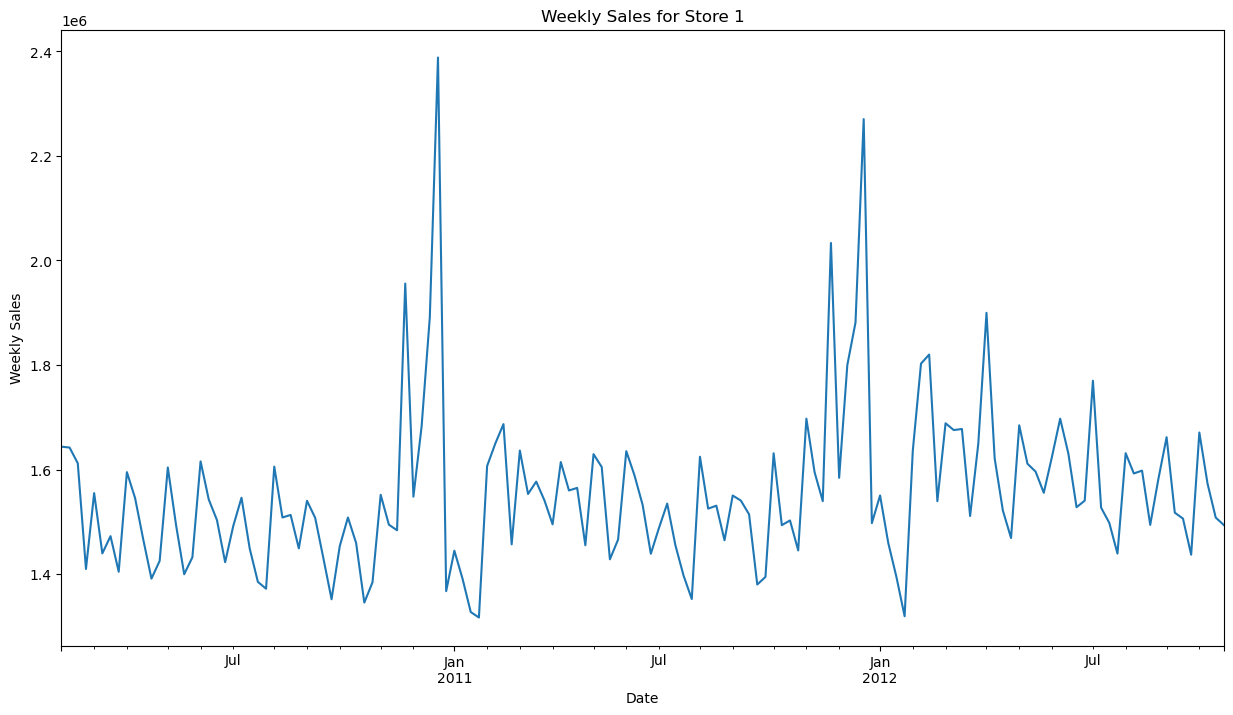

In [10]:
title=f'Weekly Sales for Store {store_num}'
ylabel='Weekly Sales'
df['Weekly_Sales'].plot(figsize=(15,8),title=title,ylabel=ylabel)

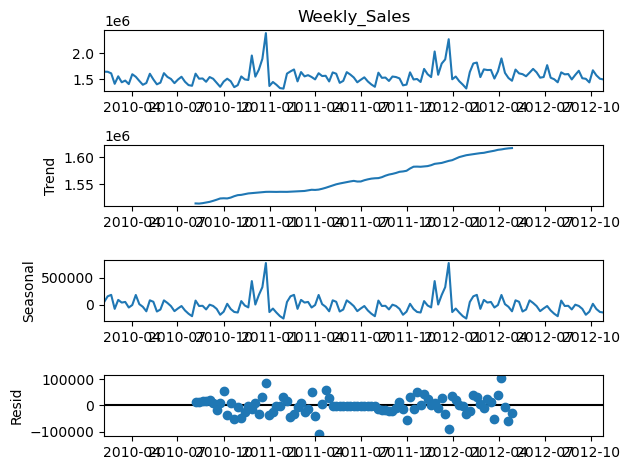

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Weekly_Sales'], model='additive')
result.plot();

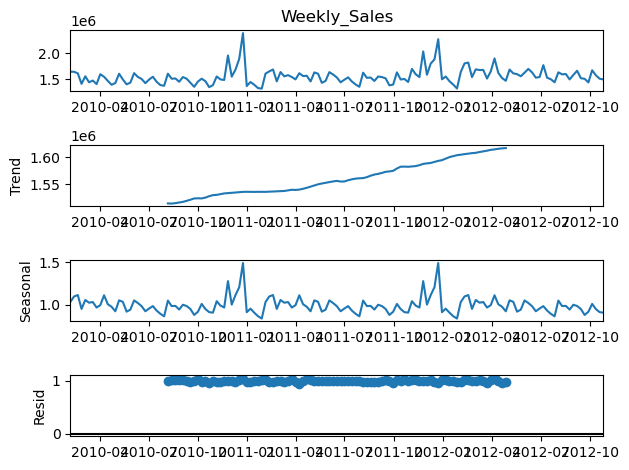

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Weekly_Sales'], model='multiplicative')
result.plot();

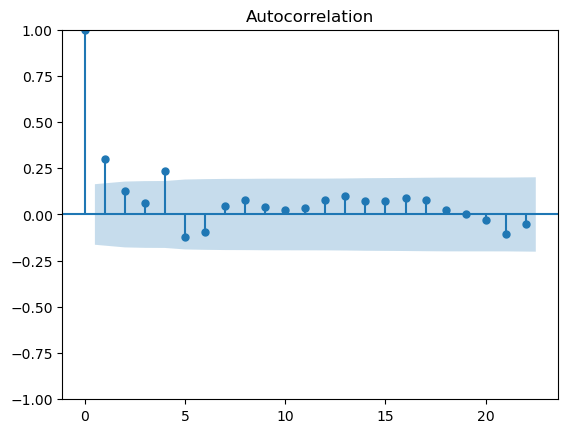

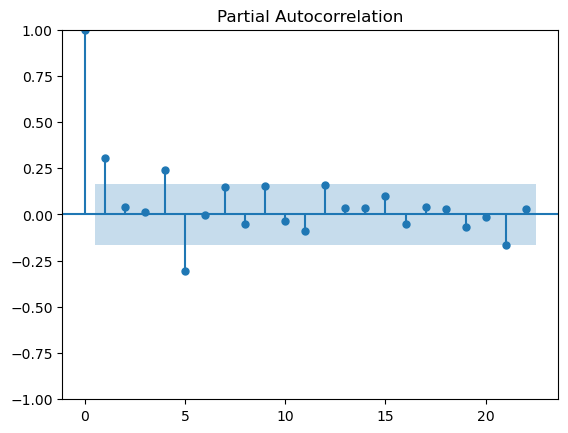

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['Weekly_Sales']);
plot_pacf(df['Weekly_Sales']);

In [14]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [15]:
adf_test(df['Weekly_Sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -5.102186
p-value                   0.000014
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [16]:
train = df.iloc[:132]
test = df.iloc[132:]

# AR Model

In [17]:
from statsmodels.tsa.ar_model import AutoReg,AutoRegResults,ar_select_order
ar_select_order(train['Weekly_Sales'],maxlag=12,glob=True).ar_lags

[1, 4, 5]

In [18]:
ar_model=AutoReg(train['Weekly_Sales'],lags=[1,4,5])
ar_fit=ar_model.fit()

In [19]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR Predictions'

ar_predictions = ar_fit.predict(start=start,end=end,dynamic=False).rename(rename)

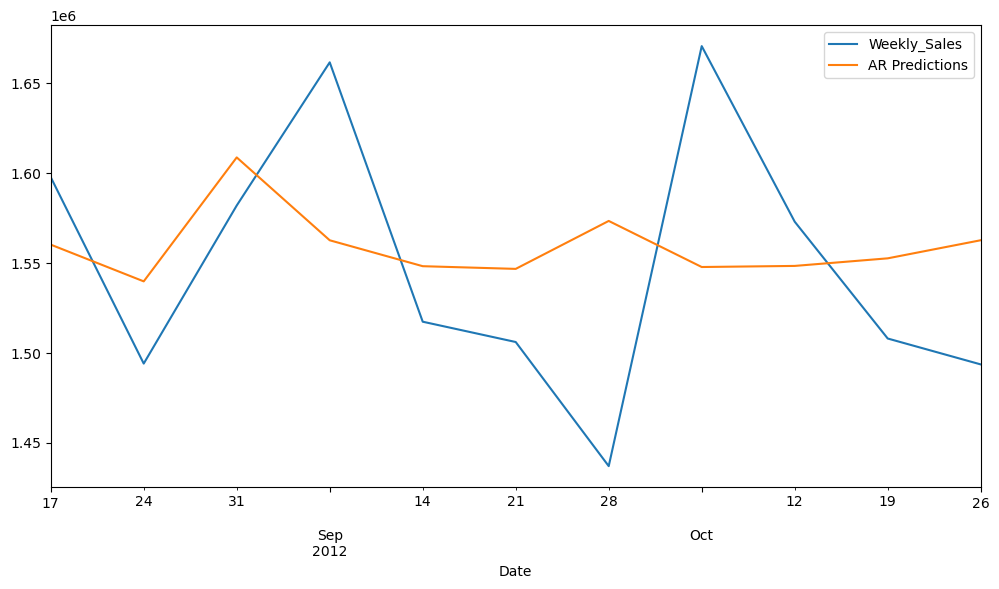

In [20]:
test['Weekly_Sales'].plot(legend=True)
ar_predictions.plot(legend=True,figsize=(12,6));

In [21]:
ar_fit.aic

3386.1256182368425

In [22]:
test['Weekly_Sales'].mean()

1549276.6036363638

In [23]:
from statsmodels.tools.eval_measures import rmse
rmse(test['Weekly_Sales'],ar_predictions)

72447.43431632688

# ARMA Model

In [51]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults

In [52]:
auto_arima(df['Weekly_Sales'],seasonal=False,d=0).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1905.531
Date:                Mon, 25 Dec 2023   AIC                           3817.063
Time:                        01:18:08   BIC                           3825.951
Sample:                    02-05-2010   HQIC                          3820.674
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.085e+06      8e+04     13.557      0.000    9.28e+05    1.24e+06
ar.L1          0.3025      0.046      6.548      0.000       0.212       0.393
sigma2      2.206e+10      0.332   6.65e+10      0.000    2.21e+10    2.21e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               269.26
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             1.67
Prob(H) (two-sided):                  0.47   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.72e+26. Standard errors may be unstable.
"""

In [53]:
arma_model = ARIMA(train['Weekly_Sales'],order=(1,0,0))
arma_results = arma_model.fit()
arma_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  132
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1762.890
Date:                Mon, 25 Dec 2023   AIC                           3531.780
Time:                        01:18:46   BIC                           3540.429
Sample:                    02-05-2010   HQIC                          3535.295
                         - 08-10-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.556e+06   2.24e+04     69.603      0.000    1.51e+06     1.6e+06
ar.L1          0.3067      0.049      6.241      0.000       0.210       0.403
sigma2      2.343e+10      0.169   1.39e+11      0.000    2.34e+10    2.34e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               220.23
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.44   Skew:                             1.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.82e+26. Standard errors may be unstable.
"""

In [54]:
start=len(train)
end=len(train)+len(test)-1
arma_predictions = arma_results.predict(start=start, end=end).rename('ARMA(1,0) Predictions')

<Axes: title={'center': 'Weekly Sales for Store 1'}, xlabel='Date'>

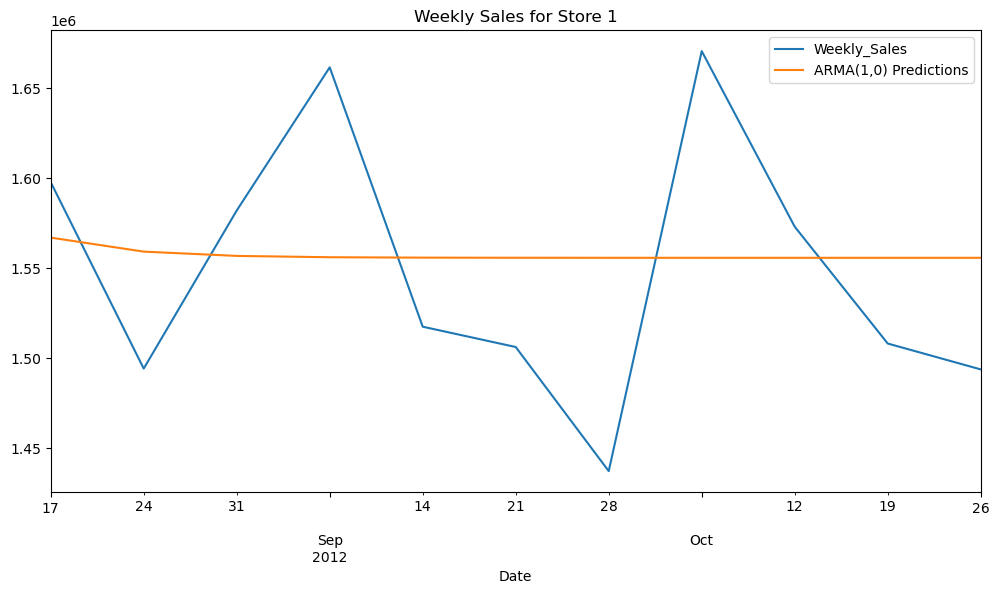

In [55]:
test['Weekly_Sales'].plot(legend=True,figsize=(12,6),title=title)
arma_predictions.plot(legend=True)

In [56]:
arma_results.aic

3531.7804185867817

In [57]:
test['Weekly_Sales'].mean()

1549276.6036363638

In [58]:
rmse(test['Weekly_Sales'],arma_predictions)

70513.23381213489

# ARIMA Model

In [24]:
auto_arima(df['Weekly_Sales'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1897.843
Date:                Mon, 25 Dec 2023   AIC                           3807.686
Time:                        01:00:49   BIC                           3825.421
Sample:                    02-05-2010   HQIC                          3814.893
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.015       0.055       0.518
ma.L2         -0.3357      0.109     -3.090      0.002      -0.549      -0.123
ma.L3         -0.6403      0.067     -9.574      0.000      -0.771      -0.509
sigma2      2.408e+10   4.97e-12   4.85e+21      0.000    2.41e+10    2.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                44.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.77
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.27e+38. Standard errors may be unstable.
"""

In [25]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults

In [26]:
arima_model = ARIMA(df['Weekly_Sales'],order=(2,1,3))
arima_results = arima_model.fit()
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1897.843
Date:                Mon, 25 Dec 2023   AIC                           3807.686
Time:                        01:00:49   BIC                           3825.421
Sample:                    02-05-2010   HQIC                          3814.893
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.015       0.055       0.518
ma.L2         -0.3357      0.109     -3.090      0.002      -0.549      -0.123
ma.L3         -0.6403      0.067     -9.574      0.000      -0.771      -0.509
sigma2      2.408e+10   4.97e-12   4.85e+21      0.000    2.41e+10    2.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                44.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.77
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.27e+38. Standard errors may be unstable.
"""

In [27]:
start=len(train)
end=len(train)+len(test)-1
arima_predictions = arima_results.predict(start=start, end=end).rename('ARIMA(2,1,3) Predictions')

<Axes: title={'center': 'Weekly Sales for Store 1'}, xlabel='Date'>

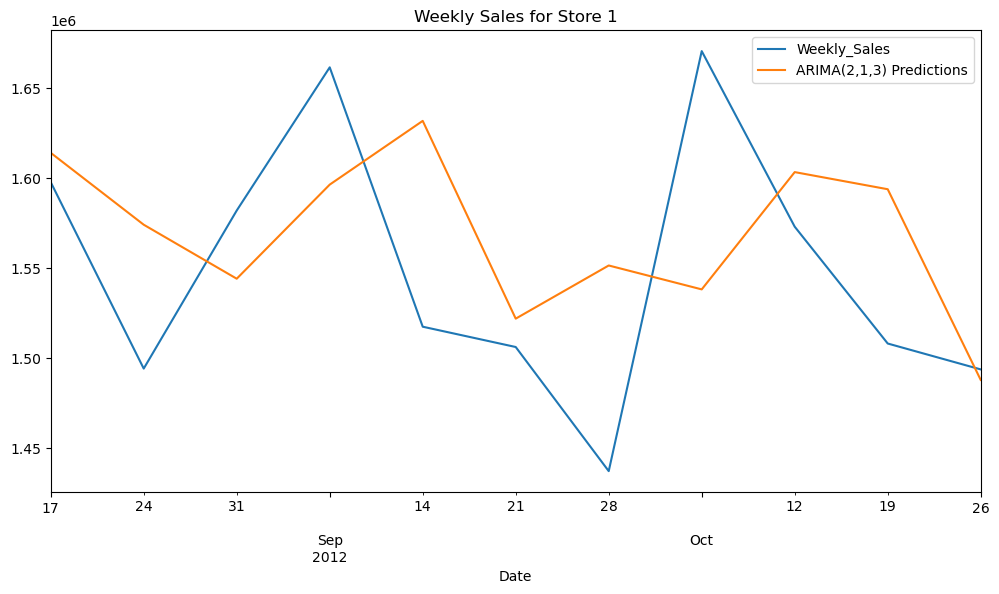

In [28]:
test['Weekly_Sales'].plot(legend=True,figsize=(12,6),title=title)
arima_predictions.plot(legend=True)

In [29]:
rmse(test['Weekly_Sales'], arima_predictions)

76723.86516020843

In [30]:
test['Weekly_Sales'].mean()

1549276.6036363638

In [31]:
arima_results.aic

3807.685900080065

# SARIMA model

In [32]:
auto_arima(df['Weekly_Sales'],seasonal=True,m=52).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 52)   Log Likelihood               -1884.296
Date:                             Mon, 25 Dec 2023   AIC                           3776.592
Time:                                     01:02:51   BIC                           3788.415
Sample:                                 02-05-2010   HQIC                          3781.396
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4168      0.091      4.596      0.000       0.239       0.594
ma.L1         -0.8985      0.048    -18.585      0.000      -0.993      -0.804
ar.S.L52       0.4936      0.038     12.973      0.000       0.419       0.568
sigma2      2.445e+10   3.87e-13   6.32e+22      0.000    2.44e+10    2.44e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.44   Jarque-Bera (JB):               155.95
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.38e+38. Standard errors may be unstable.
"""

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
sarima_model = SARIMAX(train['Weekly_Sales'],order=(1,1,1),seasonal_order=(1,0,0,52))
sarima_results = sarima_model.fit()
sarima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 52)   Log Likelihood               -1743.074
Date:                             Mon, 25 Dec 2023   AIC                           3494.148
Time:                                     01:02:52   BIC                           3505.649
Sample:                                 02-05-2010   HQIC                          3498.821
                                      - 08-10-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4272      0.096      4.439      0.000       0.239       0.616
ma.L1         -0.9002      0.052    -17.418      0.000      -1.001      -0.799
ar.S.L52       0.4786      0.042     11.492      0.000       0.397       0.560
sigma2      2.605e+10   3.81e-13   6.85e+22      0.000    2.61e+10    2.61e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.45   Jarque-Bera (JB):               123.24
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.54
Prob(H) (two-sided):                  0.19   Kurtosis:                         7.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.89e+38. Standard errors may be unstable.
"""

predicted=1597835.991, expected=1597868.05
predicted=1567383.817, expected=1494122.38
predicted=1608823.604, expected=1582083.4
predicted=1604366.632, expected=1661767.33
predicted=1591912.232, expected=1517428.87
predicted=1527700.089, expected=1506126.06
predicted=1534676.763, expected=1437059.26
predicted=1647845.54 , expected=1670785.97
predicted=1582054.128, expected=1573072.81
predicted=1586380.736, expected=1508068.77
predicted=1558949.22 , expected=1493659.74


<Axes: title={'center': 'Weekly Sales for Store 1'}, xlabel='Date'>

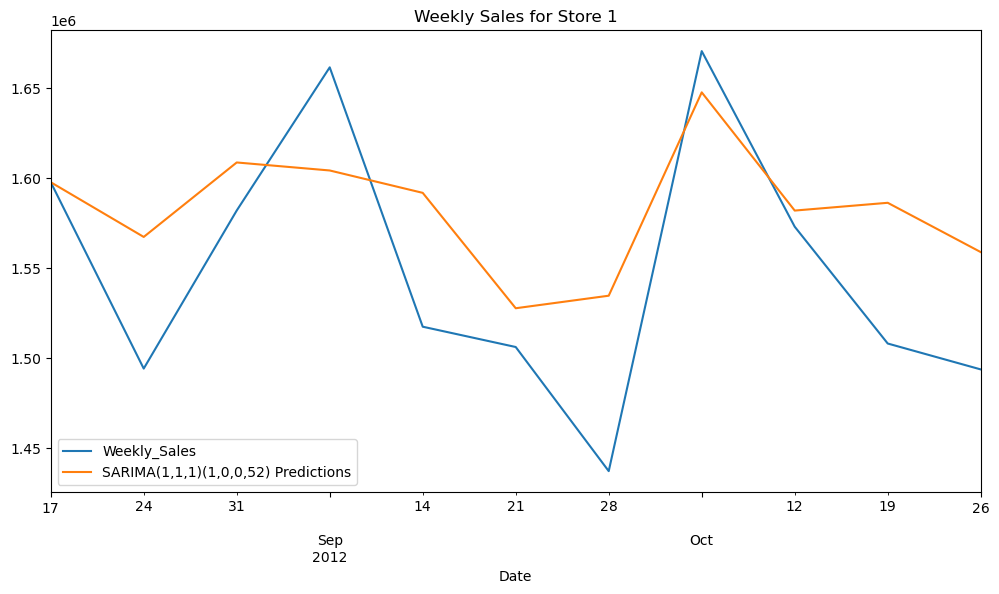

In [35]:
start=len(train)
end=len(train)+len(test)-1
sarima_predictions = sarima_results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,1)(1,0,0,52) Predictions')
for i in range(len(sarima_predictions)):
    print(f"predicted={sarima_predictions[i]:<11.10}, expected={test['Weekly_Sales'][i]}")
test['Weekly_Sales'].plot(legend=True,figsize=(12,6),title=title)
sarima_predictions.plot(legend=True)

In [36]:
sarima_results.aic

3494.1481685876597

In [37]:
test['Weekly_Sales'].mean()

1549276.6036363638

In [38]:
rmse(test['Weekly_Sales'], sarima_predictions)

57145.67675364945

In [39]:
train.columns

Index(['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')

# SARIMAX

In [82]:
sarimax_model = SARIMAX(train['Weekly_Sales'],exog=train[['Holiday_Flag']],order=(1,1,1),seasonal_order=(1,0,0,52),enforce_invertibility=True)
sarimax_results = sarimax_model.fit()
sarimax_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 52)   Log Likelihood               -1742.997
Date:                             Mon, 25 Dec 2023   AIC                           3495.994
Time:                                     01:56:07   BIC                           3510.370
Sample:                                 02-05-2010   HQIC                          3501.836
                                      - 08-10-2012                                         
Covariance Type:                               opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Holiday_Flag  7912.1767   4.51e+04      0.175      0.861   -8.05e+04    9.64e+04
ar.L1            0.4242      0.107      3.972      0.000       0.215       0.634
ma.L1           -0.8992      0.053    -17.040      0.000      -1.003      -0.796
ar.S.L52         0.4782      0.042     11.388      0.000       0.396       0.561
sigma2        2.604e+10      0.084    3.1e+11      0.000     2.6e+10     2.6e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):               126.01
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.51
Prob(H) (two-sided):                  0.20   Kurtosis:                         7.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.24e+28. Standard errors may be unstable.
"""

In [83]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Holiday_Flag']]  # requires two brackets to yield a shape of (35,1)
sarimax_predictions = sarimax_results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1,1,1)(1,0,0,52) Predictions')

<Axes: title={'center': 'Weekly Sales for Store 1'}, xlabel='Date'>

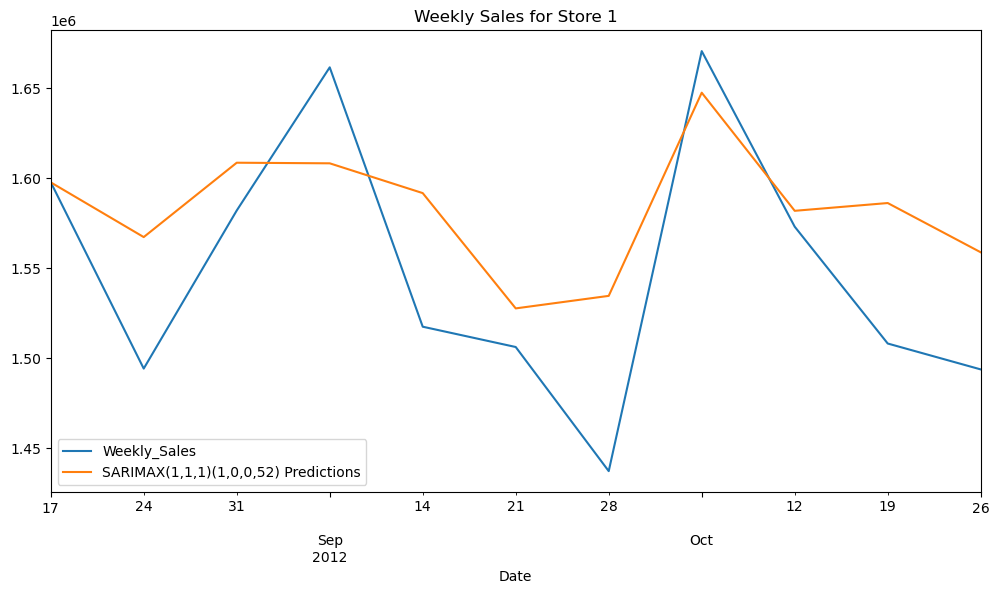

In [84]:
ax = test['Weekly_Sales'].plot(legend=True,figsize=(12,6),title=title)
sarimax_predictions.plot(legend=True)

In [85]:
sarimax_results.aic

3495.9941813135765

In [86]:
test['Weekly_Sales'].mean()

1549276.6036363638

In [87]:
rmse(test['Weekly_Sales'], sarimax_predictions)

56720.30895122327

# Model Comparisons

In [88]:
print(f"AR RMSE: {rmse(test['Weekly_Sales'], ar_predictions)}")
print(f"ARMA RMSE: {rmse(test['Weekly_Sales'], arma_predictions)}")
print(f"ARIMA RMSE: {rmse(test['Weekly_Sales'], arima_predictions)}")
print(f"SARIMA RMSE: {rmse(test['Weekly_Sales'], sarima_predictions)}")
print(f"SARIMAX RMSE: {rmse(test['Weekly_Sales'], sarimax_predictions)}")

AR RMSE: 72447.43431632688
ARMA RMSE: 70513.23381213489
ARIMA RMSE: 76723.86516020843
SARIMA RMSE: 57145.67675364945
SARIMAX RMSE: 56720.30895122327


In [89]:
print(f"AR AIC: {ar_fit.aic}")
print(f"ARMA AIC: {arma_results.aic}")
print(f"ARIMA AIC: {arima_results.aic}")
print(f"SARIMA AIC: {sarima_results.aic}")
print(f"SARIMAX AIC: {sarimax_results.aic}")

AR AIC: 3386.1256182368425
ARMA AIC: 3531.7804185867817
ARIMA AIC: 3807.685900080065
SARIMA AIC: 3494.1481685876597
SARIMAX AIC: 3495.9941813135765


# SARIMA Forecast

<Axes: title={'center': 'Weekly Sales for Store 1'}, xlabel='Date'>

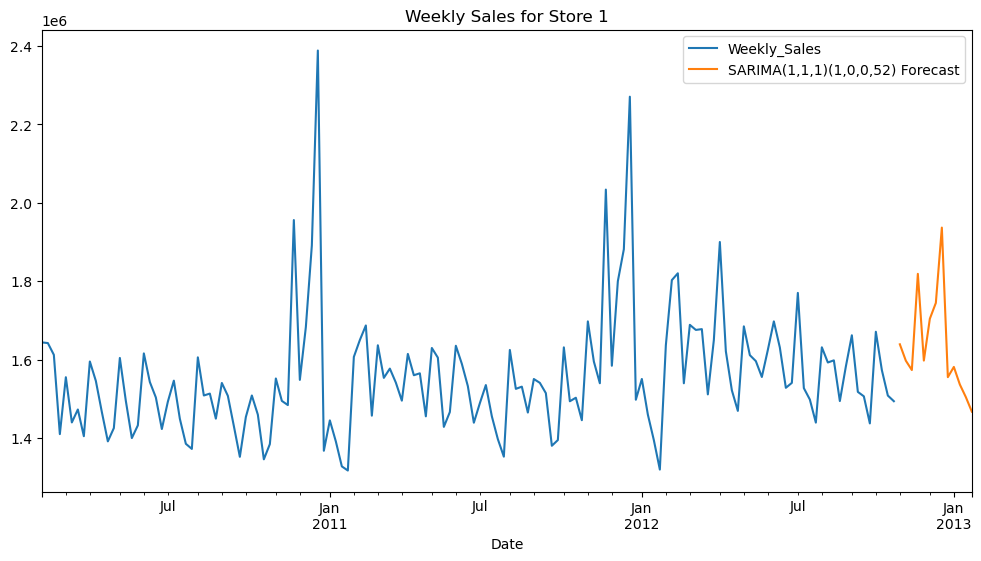

In [90]:
sarima_final_model = SARIMAX(df['Weekly_Sales'],order=(1,1,1),seasonal_order=(1,0,0,52))
sarima_final_results = sarima_final_model.fit()
sarima_fcast = sarima_final_results.predict(len(df),len(df)+12,typ='levels').rename('SARIMA(1,1,1)(1,0,0,52) Forecast')
df['Weekly_Sales'].plot(legend=True,figsize=(12,6),title=title)
sarima_fcast.plot(legend=True)

# SARIMAX Forecast

<Axes: title={'center': 'Weekly Sales for Store 1'}, xlabel='Date'>

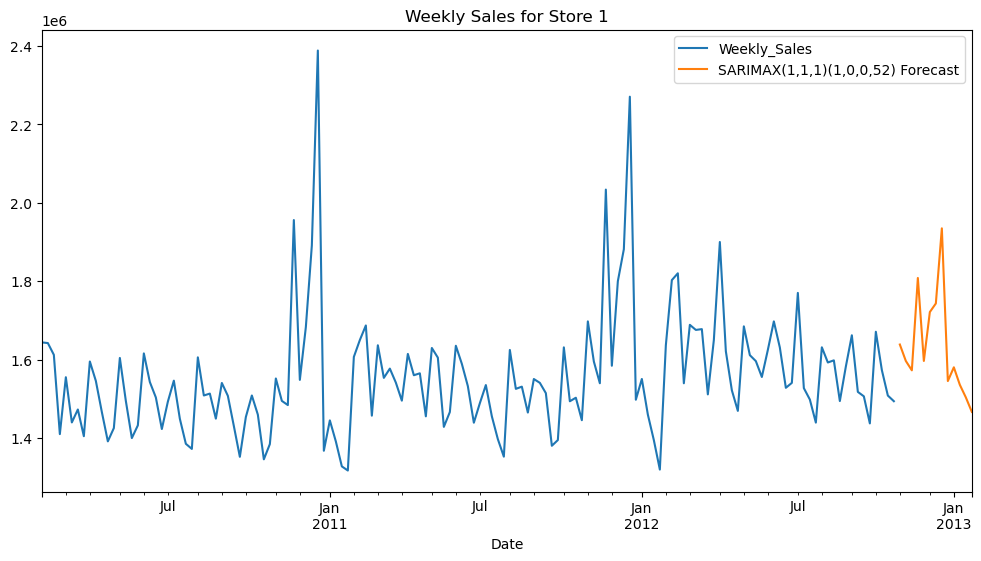

In [96]:
sarimax_final_model = SARIMAX(df['Weekly_Sales'],exog=df['Holiday_Flag'],order=(1,1,1),seasonal_order=(1,0,0,52),enforce_invertibility=True)
sarimax_final_results = sarimax_final_model.fit()
exog_forecast = df[130:][['Holiday_Flag']]
sarimax_fcast = sarimax_final_results.predict(len(df),len(df)+12,exog=exog_forecast).rename('SARIMAX(1,1,1)(1,0,0,52) Forecast')
df['Weekly_Sales'].plot(legend=True,figsize=(12,6),title=title)
sarimax_fcast.plot(legend=True)